In [5]:
import os
import numpy as np
import pandas as pd
import string
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import tensorflow
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [4]:
path = "../Data/Pictures/asl"
dirs = os.listdir(path)

In [ ]:
dictionary_target = {}
for i in range(25):
    if string.ascii_lowercase[i]!="j":
        dictionary_target[string.ascii_lowercase[i]]=i

In [ ]:
dirs=[]
for i in os.listdir(path):
        if i in dictionary_target:
            dirs.append(i)

In [ ]:
def load_dataset(path):
    label_binrizer = LabelBinarizer()
    dirs = []
    image_data = []
    target_data = []
    for i in os.listdir(path):
        if i in dictionary_target:
            dirs.append(i)
    for Dir in dirs:
        path_img = path+'/'+Dir
        images = os.listdir(path_img)
        for image in images:

            temp_img = cv2.imread(path_img+'/'+image)
            
            # Smoothing images
            kernel = np.ones((5,5),np.float32)/30
            temp_img = cv2.filter2D(temp_img,-1,kernel)
            
            # Correcting sizing for analysis
            temp_img = cv2.resize(temp_img, (28, 28))
            
            # Correcting color to grey
            temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
            
            # Assign each image to a list
            image_data.append(temp_img)
            
            # Assign target/letter for each image to another list
            target_data.append(dictionary_target[Dir])
    
    # Turn images into np.arrays
    image_data = np.array(image_data)
    
    # Turn target-value into categorical variables
    target_data_binary = label_binrizer.fit_transform(target_data)
    
    # As data ist ordered, shuffle
    image_data, target_data_binary = shuffle(image_data, target_data_binary, random_state=1)
    
    return image_data, target_data_binary, target_data

  #  X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.05)
  #  return X_train, y_train, X_test, y_test

In [ ]:
image_data, target_data_binary, target_data = load_dataset(path)

In [ ]:
image_data

In [ ]:
image_data = image_data / 255

In [ ]:
X_image_data = image_data.reshape(image_data.shape[0], 28, 28, 1)

In [ ]:
X_image_data.shape

In [ ]:
plt.imshow(X_image_data[0].reshape(28,28))

In [ ]:
X_image_data

In [ ]:
target_data_binary

In [ ]:
target_data_binary.shape

In [6]:
from keras.models import load_model
model = load_model("../Models/my_model.h5")

In [17]:
y_predict = model.predict(X_image_data)

In [18]:
accuracy_score(target_data_binary, y_predict.round())

0.12334328358208956

In [7]:
old_data = pd.read_csv("../Data/sign_mnist_train.csv")

In [8]:
target_data_old_num = old_data['label'].values

In [9]:
target_data_old_letter = []
for i in target_data_old_num:
    target_data_old_letter.append(string.ascii_uppercase[i])    

In [10]:
target_data_old_letter = np.array(target_data_old_letter)

In [11]:
label_binrizer = LabelBinarizer()
target_data_old_binary = label_binrizer.fit_transform(target_data_old_letter)

In [12]:
target_data_old_binary.shape

(27455, 24)

In [13]:
X_image_data_old = old_data.drop('label', axis = 1)

In [14]:
X_image_data_old = X_image_data_old.values

In [15]:
X_image_data_old = X_image_data_old / 255

In [16]:
X_image_data_old = X_image_data_old.reshape(X_image_data_old.shape[0], 28, 28, 1)

In [17]:
X_image_data_old.shape

(27455, 28, 28, 1)

In [18]:
target_data_old_binary.shape

(27455, 24)

In [25]:
X_image_data_merged = np.concatenate((X_image_data, X_image_data_old))

NameError: name 'X_image_data' is not defined

In [26]:
target_data_binary_merged = np.concatenate((target_data_binary, target_data_old_binary))

NameError: name 'target_data_binary' is not defined

In [ ]:
target_data_binary_merged.shape

In [34]:
X_image_data_merged, target_data_binary_merged = shuffle(X_image_data_merged, target_data_binary_merged, random_state=1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_image_data_merged, target_data_binary_merged, test_size=0.3, random_state= 47)

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [37]:
def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (28,28,1)))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (3,3)))
    
    model.add(Conv2D(128, kernel_size = [5,5], padding = 'same', activation = 'relu'))
    model.add(Conv2D(128, kernel_size = [5,5], padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (3,3)))
    
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (3,3)))
    
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.5))
    
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(24, activation = 'softmax'))
    
    print("MODEL CREATED")
    return model

In [38]:
model = create_model()

MODEL CREATED


In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         204928    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 128)         409728    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 256)         295168    
__________

In [40]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])

In [51]:
model_hist = model.fit(X_train, y_train, batch_size = 256, epochs = 15, validation_data=(X_test, y_test))

Train on 30943 samples, validate on 13262 samples
Epoch 1/15
30943/30943 [==============================] - 483s 16ms/step - loss: 3.0994 - acc: 0.0794 - val_loss: 10.7165 - val_acc: 0.0531
Epoch 2/15
30943/30943 [==============================] - 498s 16ms/step - loss: 2.8214 - acc: 0.1376 - val_loss: 3.5997 - val_acc: 0.0779
Epoch 3/15
30943/30943 [==============================] - 501s 16ms/step - loss: 2.6215 - acc: 0.1787 - val_loss: 3.2260 - val_acc: 0.1314
Epoch 4/15
30943/30943 [==============================] - 475s 15ms/step - loss: 2.2874 - acc: 0.2421 - val_loss: 2.7805 - val_acc: 0.1604
Epoch 5/15
30943/30943 [==============================] - 462s 15ms/step - loss: 1.9371 - acc: 0.3266 - val_loss: 3.1187 - val_acc: 0.1460
Epoch 6/15
30943/30943 [==============================] - 501s 16ms/step - loss: 1.6962 - acc: 0.4038 - val_loss: 4.4192 - val_acc: 0.1147
Epoch 7/15
30943/30943 [==============================] - 494s 16ms/step - loss: 1.4268 - acc: 0.4901 - val_loss: 2

In [52]:
model.save("../Models/my_model_new_data.h5")

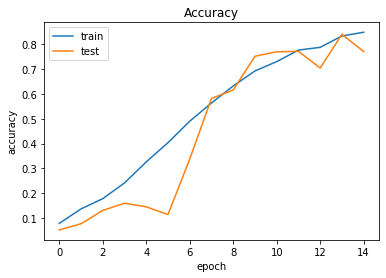

In [54]:
plt.plot(model_hist.history['acc'])
plt.plot(model_hist.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [1]:
import numpy as np
import cv2

cap = cv2.VideoCapture(1)

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        
        
        #frame = cv2.flip(frame,0)

        # write the flipped frame
        # out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cv2.imshow('wait frame',frame)
cv2.waitKey(10000)
cap.release()
cv2.destroyAllWindows()

In [1]:
frame2 = frame

NameError: name 'frame' is not defined

In [383]:
# frame = frame2

In [34]:
import numpy as np
import cv2

cap = cv2.VideoCapture(1)
font=cv2.FONT_HERSHEY_SIMPLEX

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        
        
        frame = cv2.flip(frame,1)

        # write the flipped frame
        # out.write(frame)
        cv2.putText(frame, letter_show,(100,130),font,1,(255,255,255),2)
        #cv2.putText(frame, letter_show2,(100,100),font,1,(0,0,255),2)
        #cv2.putText(frame, letter_show3,(100,160),font,1,(0,255,255),2)
        cv2.imshow('frame',frame)
        # Correcting color to gray
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Smoothing images
        kernel = np.ones((3,3),np.float32)/30
        frame = cv2.filter2D(frame,-1,kernel)

        # Correcting sizing for analysis
        frame = cv2.resize(frame, (28, 28))
        #frame2 = frame
        #frame2 = cv2.resize(frame, (600, 600))
        #cv2.imshow("frame2", frame2)
        frame = frame.reshape(1, 28, 28, 1)
        y_frame = model.predict(frame)
        #y_frame2 = model_old.predict(frame)
        #y_frame3 = model_midterm.predict(frame)
        for i in range(24):
            if y_frame[0][i] == 1:
                letter_show = np.unique(target_data_old_letter)[i]
        #for i in range(24):
          #  if y_frame2[0][i] == 1:
            #    letter_show2 = np.unique(target_data_old_letter)[i]
       # for i in range(24):
           # if y_frame3[0][i] == 1:
            #    letter_show3 = np.unique(target_data_old_letter)[i]
        if cv2.waitKey(1) & 0xFF == ord('q'):# or letter_show == "D":
            break
    else:
        break

# Release everything if job is finished
#cv2.imshow('wait frame',frame)
#cv2.waitKey(10000)
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [30]:
import numpy as np
import cv2

cap = cv2.VideoCapture(1)
font=cv2.FONT_HERSHEY_SIMPLEX

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        
        
        frame = cv2.flip(frame,1)

        # write the flipped frame
        # out.write(frame)
        cv2.putText(frame, letter_show,(100,130),font,1,(255,255,255),2)
        cv2.putText(frame, letter_show2,(100,100),font,1,(0,0,255),2)
        cv2.putText(frame, letter_show3,(100,160),font,1,(0,255,255),2)
        cv2.imshow('frame',frame)
        # Correcting color to gray
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Smoothing images
        kernel = np.ones((3,3),np.float32)/30
        frame = cv2.filter2D(frame,-1,kernel)

        # Correcting sizing for analysis
        frame = cv2.resize(frame, (28, 28))
        frame2 = frame
        frame2 = cv2.resize(frame, (600, 600))
        cv2.imshow("frame2", frame2)
        frame = frame.reshape(1, 28, 28, 1)
        y_frame = model_old.predict(frame)
        y_frame2 = model_old.predict(frame)
        y_frame3 = model_midterm.predict(frame)
        for i in range(24):
            if y_frame[0][i] == 1:
                letter_show = np.unique(target_data_old_letter)[i]
        for i in range(24):
            if y_frame2[0][i] == 1:
                letter_show2 = np.unique(target_data_old_letter)[i]
        for i in range(24):
            if y_frame3[0][i] == 1:
                letter_show3 = np.unique(target_data_old_letter)[i]
        if cv2.waitKey(1) & 0xFF == ord('q'):# or letter_show == "D":
            break
    else:
        break

# Release everything if job is finished
#cv2.imshow('wait frame',frame)
#cv2.waitKey(10000)
cap.release()
cv2.destroyAllWindows()

NameError: name 'letter_show2' is not defined

In [31]:
cap.release()
cv2.destroyAllWindows()

In [114]:
# Correcting color to gray
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Smoothing images
kernel = np.ones((3,3),np.float32)/30
frame = cv2.filter2D(frame,-1,kernel)

# Correcting sizing for analysis
frame = cv2.resize(frame, (28, 28)) 

error: C:\Anaconda2\conda-bld\opencv-contrib_1513946725639\work\opencv\modules\imgproc\src\color.cpp:11048: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


TypeError: Invalid shape (1, 28, 28, 1) for image data

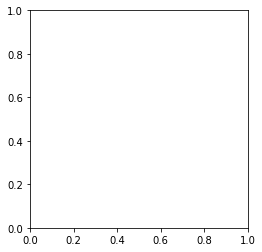

In [115]:
plt.imshow(frame)

In [406]:
frame = frame.reshape(1, 28, 28, 1)

In [432]:
y_frame = model.predict(frame)

In [433]:
y_frame.round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [434]:
for i in range(24):
    if y_frame[0][i] == 1:
        print(np.unique(target_data_old_letter)[i])

L


In [92]:
np.unique(target_data_old_letter)[2]

'C'

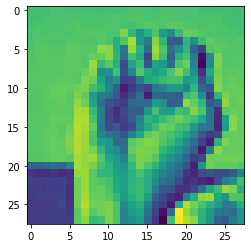

In [91]:
plt.imshow(X_train[48].reshape(28,28))

In [73]:
from keras.models import load_model
model_old = load_model("../Models/my_model.h5")

In [164]:
y_frame = model_old.predict(frame)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_image_data_merged, target_data_binary_merged, test_size=0.3, random_state= 0, stratify=target_data_binary_merged)

In [46]:
def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (28,28,1)))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (3,3)))
    
    model.add(Conv2D(128, kernel_size = [5,5], padding = 'same', activation = 'relu'))
    model.add(Conv2D(128, kernel_size = [5,5], padding = 'same', activation = 'relu'))
    model.add(Conv2D(128, kernel_size = [5,5], padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
        
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.5))
    
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(24, activation = 'softmax'))
    
    print("MODEL CREATED")
    return model

In [47]:
model = create_model()

MODEL CREATED


In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 128)         204928    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 128)         409728    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 128)         409728    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
__________

In [49]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])

In [51]:
model_hist = model.fit(X_train, y_train, batch_size = 128, epochs = 30, validation_data=(X_test, y_test))

Train on 30943 samples, validate on 13262 samples
Epoch 1/30
30943/30943 [==============================] - 682s 22ms/step - loss: 2.9861 - acc: 0.0819 - val_loss: 3.0538 - val_acc: 0.0805
Epoch 2/30
30943/30943 [==============================] - 679s 22ms/step - loss: 2.6994 - acc: 0.1497 - val_loss: 2.6284 - val_acc: 0.1608
Epoch 3/30
30943/30943 [==============================] - 675s 22ms/step - loss: 2.5078 - acc: 0.2106 - val_loss: 2.4726 - val_acc: 0.2120
Epoch 4/30
30943/30943 [==============================] - 675s 22ms/step - loss: 2.3050 - acc: 0.2558 - val_loss: 2.2206 - val_acc: 0.2535
Epoch 5/30
30943/30943 [==============================] - 675s 22ms/step - loss: 2.0446 - acc: 0.3056 - val_loss: 1.9656 - val_acc: 0.3242
Epoch 6/30
30943/30943 [==============================] - 671s 22ms/step - loss: 1.6737 - acc: 0.4104 - val_loss: 4.8548 - val_acc: 0.1334
Epoch 7/30
30943/30943 [==============================] - 674s 22ms/step - loss: 1.2068 - acc: 0.5527 - val_loss: 0.

In [52]:
model.save("../Models/my_model_gathered.h5")

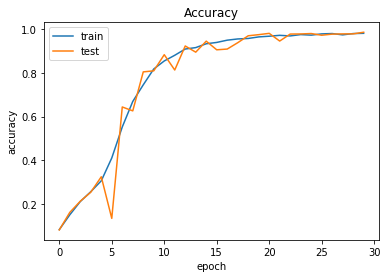

In [53]:
plt.plot(model_hist.history['acc'])
plt.plot(model_hist.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [419]:
temp_img = np.load("../Code/data.npy")

In [19]:
model = load_model("../Models/my_model_gathered.h5")

In [420]:
temp_img.shape

(28, 28)

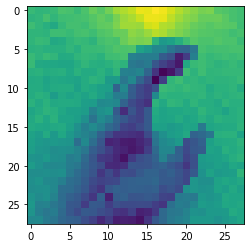

In [421]:
plt.imshow(temp_img)

In [422]:
temp_img = temp_img.reshape(1, 28, 28, 1)

In [55]:
temp_img = frame

In [56]:
temp_img.shape

(1, 28, 28, 1)

In [57]:
y_frame = model.predict(temp_img)

In [58]:
for i in range(24):
    if y_frame.round()[0][i] == 1:
        print(np.unique(target_data_old_letter)[i])

N


In [28]:
 model_old = load_model("../Models/my_model.h5")

In [60]:
y_frame = model_old.predict(temp_img)

In [61]:
for i in range(24):
    if y_frame.round()[0][i] == 1:
        print(np.unique(target_data_old_letter)[i])

C


In [12]:
 model_midterm = load_model("../Models/my_model_new_data.h5")

In [63]:
y_frame = model_midterm.predict(temp_img)

In [64]:
for i in range(24):
    if (y_frame.round())[0][i] == 1:
        print(np.unique(target_data_old_letter)[i])

Q


In [268]:
y_frame.round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)